# Prediction of back pain using Logistic Regression, Python

The data comprises of 13 columns and 310 observations. 12 columns are numerical attributes of the spine/ back. The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain. The intent is to predict the Status based on the 12 variables. 

# Lower Back Pain Symptoms Dataset

<strong> kaggle link: https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

Description
310 Observations, 13 Attributes (12 Numeric Predictors, 1 Binary Class Attribute - No Demographics)

Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:

The large nerve roots in the low back that go to the legs may be irritated
The smaller nerves that supply the low back may be irritated
The large paired lower back muscles (erector spinae) may be strained
The bones, ligaments or joints may be damaged
An intervertebral disc may be degenerating
An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

This data set is about to identify a person is abnormal or normal using collected physical spine details/data.

## Importing the Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [3]:
df=pd.read_csv('Dataset_spine.csv')

## Basic Data Exploration
### Checking for Central Tendency Measure also called 6 Point Summary

In [4]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
df.tail()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal,NaN


In [6]:
df.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')

In [9]:
# Rename the columns of 
df1 = df.rename(columns = {'Col1': 'pelvic_incidence', 'Col2': 'pelvic tilt','Col3': 'lumbar_lordosis_angle','Col4': 'sacral_slope',
                          'Col5': 'pelvic_radius','Col6': 'degree_spondylolisthesis','Col7': 'pelvic_slope','Col8': 'Direct_tilt',
                          'Col9': 'thoracic_slope','Col10': 'cervical_tilt',
                          'Col11': 'sacrum_angle','Col12': 'scoliosis_slope',
                          'Class_att': 'Status'}, inplace = False)

In [11]:
del df1['Unnamed: 13']

In [12]:
df1.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [14]:
df1.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


## EDA

<strong>
The major steps to be covered for EDA are below: <br>
1.Handle Missing value (Not required no missing data.)<br>
2.Removing duplicates (Not required no duplicate data.)<br>
3.Outlier Treatment<br>
4.Normalizing and Scaling( Numerical Variables) (Not Required) <br>
5.Encoding Categorical variables( Dummy Variables) (Not Required)<br>
6. Univariate Analysis<br>
7.Bivariate Analysis
</strong>

## Handle Missing value

In [15]:
##Checking for missing values. There are no missing values
print(df1.isnull().sum())

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64


## Removing duplicates

In [16]:
# checking for duplicates.
duplicate_rows = df1[df1.duplicated()]

In [17]:
duplicate_rows

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status


# Outliers

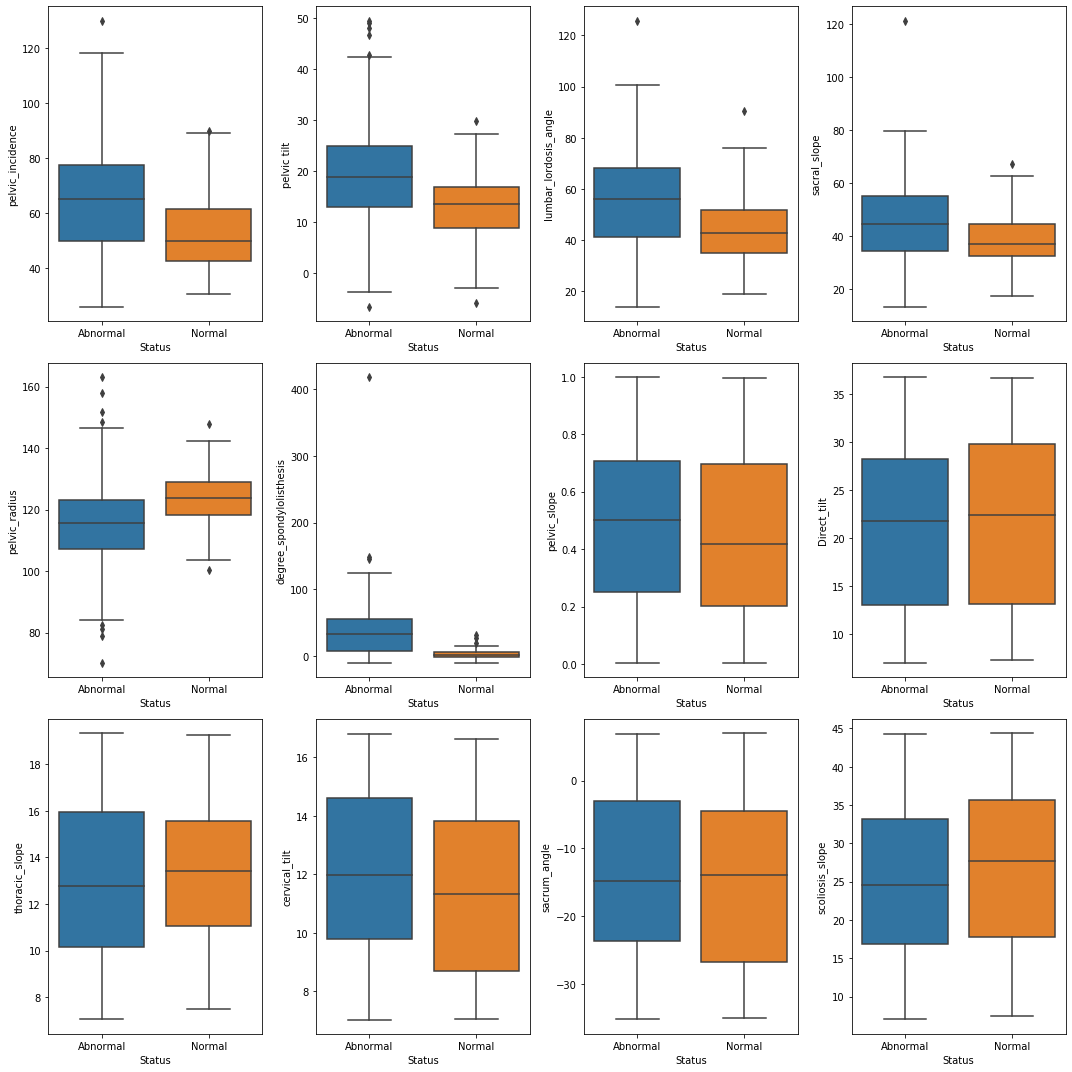

In [20]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(df1.columns)-1):
    sns.boxplot(x="Status", y=df1.iloc[:,i], data=df1, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [23]:
# Removal of Outliers for the Newspaper column.
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pelvic_incidence            26.447401
pelvic tilt                 11.453326
lumbar_lordosis_angle       26.000000
sacral_slope                19.348766
pelvic_radius               14.758478
degree_spondylolisthesis    39.683625
pelvic_slope                 0.480479
Direct_tilt                 15.899675
thoracic_slope               5.471725
cervical_tilt                4.830670
sacrum_angle                20.792428
scoliosis_slope             16.790525
dtype: float64


In [24]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(279, 13)

In [25]:
df1.shape

(310, 13)

### Checking for corrrelation using Heat Map
## Heat Map can also be used for Multivariate analysis

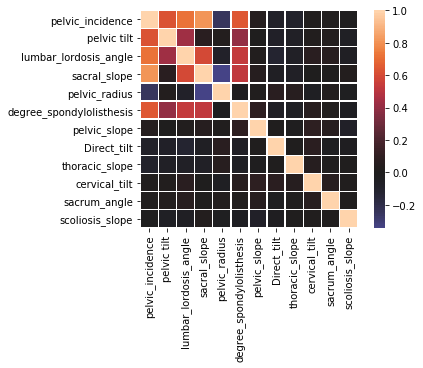

In [18]:
corr_df = df1.corr()

# Generate the correlation plot 
sns.heatmap(corr_df, center=0, square=True, linewidths=.5)
plt.show()

In [19]:
# Seeing the correlation values
corr_df

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


## Bivariate Analysis

## Box plot

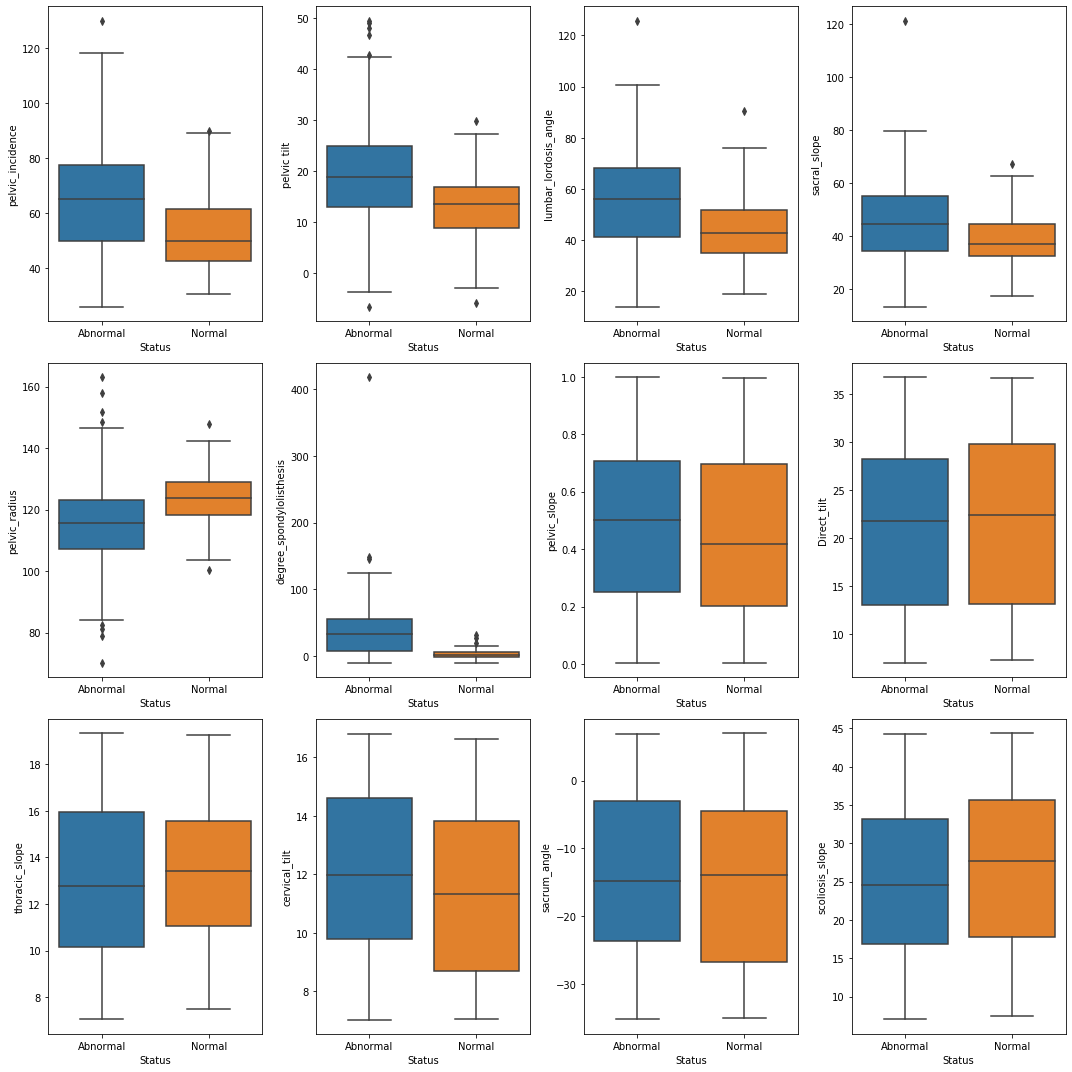

In [26]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(df1.columns)-1):
    sns.boxplot(x="Status", y=df1.iloc[:,i], data=df1, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

## Check for linear scalability (only to apply the logistic model)

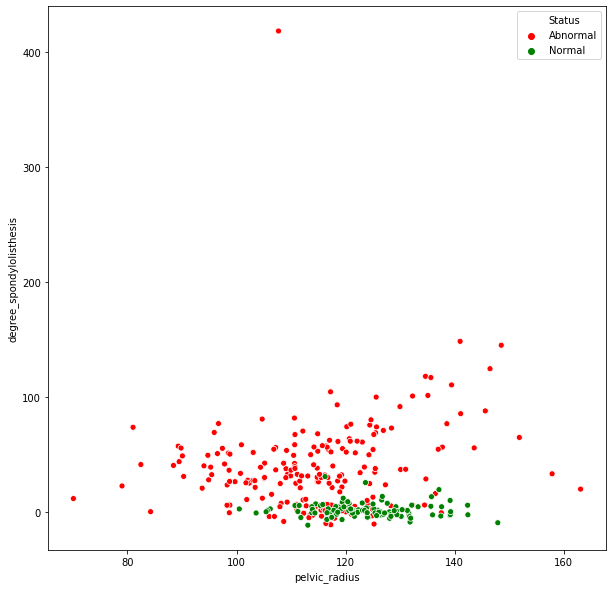

In [22]:
# Linear scalability is possible for pelvic_radius vs degree_spondylolisthesis
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pelvic_radius", y="degree_spondylolisthesis", hue = "Status", data = df1, palette =['red','green'])
plt.show()

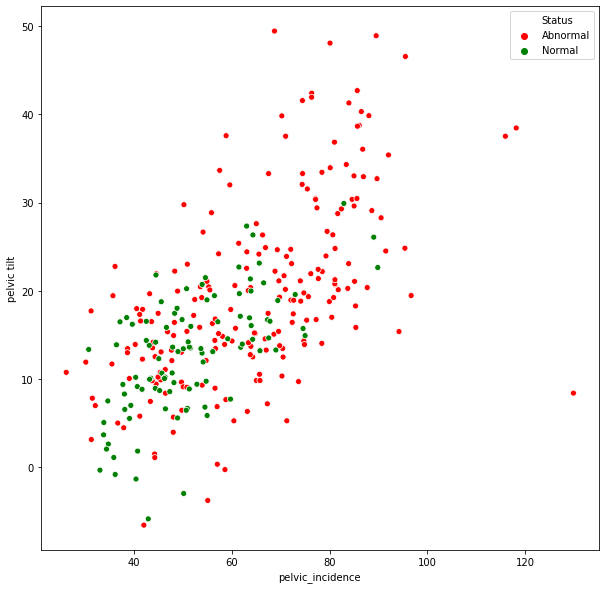

In [27]:
# Linear scalability is possible for "pelvic_incidence" vs "pelvic tilt",
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pelvic_incidence", y="pelvic tilt", hue = "Status", data = df1, palette =['red','green'])
plt.show()

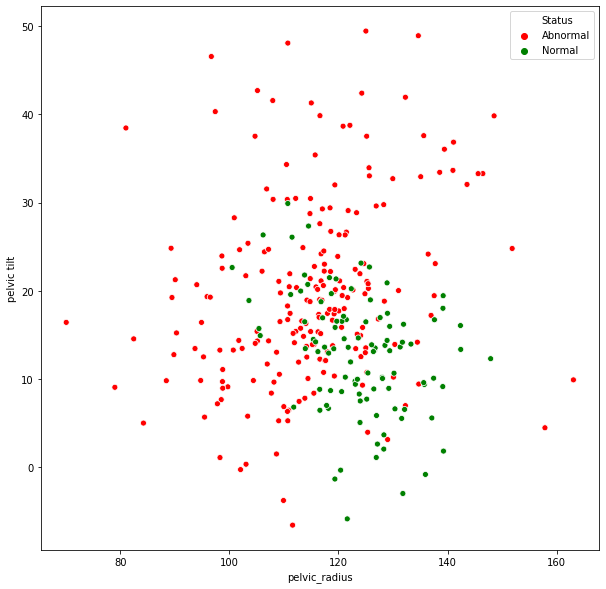

In [28]:
# Linear scalability is possible for pelvic_radius vs "pelvic tilt
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pelvic_radius", y="pelvic tilt", hue = "Status", data = df1, palette =['red','green'])
plt.show()

# Convert the anomrla to 1 and normal to 0.... thus converting categorical to numerical to pass in midel. Model cannot take string input

In [30]:
df1.loc[df1.Status=='Abnormal','Status'] = 1
df1.loc[df1.Status=='Normal','Status'] = 0

In [31]:
X = df1.loc[:, df1.columns != "Status"]
y = df1.loc[:, df1.columns == "Status"]

<strong>
train test slpit
 sclaing the data using normalisation
transform of the test and train x axis.
we do not scale the y we onlu scale x axis

In [ ]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    #train_scaled = scaler.transform(X_train)
    #test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [ ]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [ ]:
logreg_result = logistic_regression(X_train_scaled, y_train)

In [ ]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))